In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../" directory

# **Business Understanding**

Since 2008, Airbnb has enabled guests and hosts to experience travel in a more unique and personalized way. To explore this, Airbnb has provided datasets for two cities: **Boston** and **Seattle**.

The goal of this post is to compare these two locations to understand how different factors influence prices and availability. For this analysis, I utilized two datasets from Kaggle:

- Seattle Airbnb Open Data
- Boston Airbnb Open Data

I found it intriguing to address the following questions:

- How do the month and location impact booking prices?
- Which apartments receive the most reviews?
- How does availability vary based on location and month?


# **Content of data sets**

The following Airbnb activity is included in each dataset:

- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day
- Listings, including full descriptions and average review score

I need to use 2 files from each city to answer initial questions for my analysis:

- Calendar.csv
- Reviews.csv


In [3]:
# function to read a file

def read_file(path):
    return pd.read_csv(path)

# load files into dataframes

df_seattle_calendar = read_file('seattle/calendar.csv')
df_seattle_reviews = read_file('seattle/reviews.csv')

df_boston_calendar = read_file('boston/calendar.csv')
df_boston_reviews = read_file('boston/reviews.csv')

df_boston_calendar.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


# **Data Understanding**

In the calendar data, prices are listed in the format \\$85.00, so I need to remove the '\\$' symbol and convert the values to numeric format for analysis. Additionally, I need to address any null values in the price data.
To analyze the data by month, the table needs to be grouped accordingly.
For the review data, no transformation is necessary; I only need to filter the data to display the properties with the highest number of reviews.
Regarding availability, I will focus on entries where availability is marked as true and ignore those where it is false.

# **Question 1: How do the month and location impact booking prices?**
**Prepare Data**

A new column called 'numeric_price' will be added to display the price in numeric format. Additionally, another column named 'month' will be created to indicate only the month extracted from the date.

In [6]:
# create a function to translate price to numeric format
def price_to_numeric(prices):
  return pd.to_numeric(prices.replace('[\$,]', '', regex=True), errors='coerce')

# create one column with the price in numeric format

seattle_prices = df_seattle_calendar.price
df_seattle_calendar['numeric_price'] = price_to_numeric(seattle_prices)
boston_prices = df_boston_calendar.price
df_boston_calendar['numeric_price'] = price_to_numeric(boston_prices)

print(df_seattle_calendar.dropna().head(), df_boston_calendar.dropna().head())

    listing_id        date available   price  numeric_price
0       241032  2016-01-04         t  $85.00           85.0
1       241032  2016-01-05         t  $85.00           85.0
9       241032  2016-01-13         t  $85.00           85.0
10      241032  2016-01-14         t  $85.00           85.0
14      241032  2016-01-18         t  $85.00           85.0      listing_id        date available   price  numeric_price
365     3075044  2017-08-22         t  $65.00           65.0
366     3075044  2017-08-21         t  $65.00           65.0
367     3075044  2017-08-20         t  $65.00           65.0
368     3075044  2017-08-19         t  $75.00           75.0
369     3075044  2017-08-18         t  $75.00           75.0


In [7]:
# create a function to format to datetime
def format_to_datetime(date_str):
  return pd.to_datetime(seattle_dates_str)
# create additional column with only the month of the date

seattle_dates_str = df_seattle_calendar.date
seattle_dates = format_to_datetime(seattle_dates_str)
df_seattle_calendar['month'] = seattle_dates.dt.month

boston_dates_str = df_boston_calendar.date
boston_dates = format_to_datetime(boston_dates_str)
df_boston_calendar['month'] = boston_dates.dt.month

print(df_seattle_calendar.dropna().head(), df_boston_calendar.dropna().head())

    listing_id        date available   price  numeric_price  month
0       241032  2016-01-04         t  $85.00           85.0      1
1       241032  2016-01-05         t  $85.00           85.0      1
9       241032  2016-01-13         t  $85.00           85.0      1
10      241032  2016-01-14         t  $85.00           85.0      1
14      241032  2016-01-18         t  $85.00           85.0      1      listing_id        date available   price  numeric_price  month
365     3075044  2017-08-22         t  $65.00           65.0      1
366     3075044  2017-08-21         t  $65.00           65.0      1
367     3075044  2017-08-20         t  $65.00           65.0      1
368     3075044  2017-08-19         t  $75.00           75.0      1
369     3075044  2017-08-18         t  $75.00           75.0      1


**Data Modeling**
The data is represented in a bar char, showing the average prices per each month in Boston and Seattle

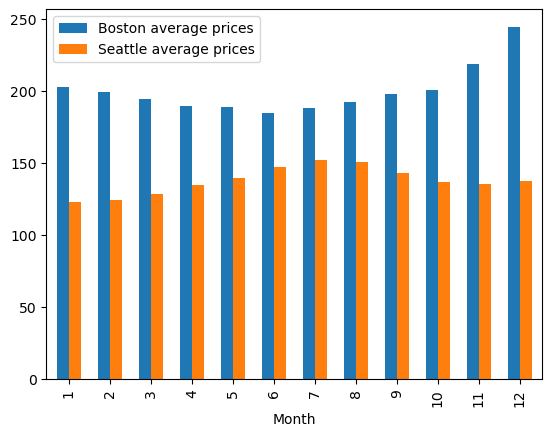

In [9]:
# calculate average prices per month for each city an show the results together

average_price_per_month_seattle = df_seattle_calendar.groupby(['month']).numeric_price.mean()
average_price_per_month_boston = df_boston_calendar.groupby(['month']).numeric_price.mean()
df_mixed = pd.DataFrame({ 
    'Month': average_price_per_month_boston.index, 
    'BostonPrice': average_price_per_month_boston, 
    'SeattlePrice': average_price_per_month_seattle 
}) 

# Plotting the data

prices_plt = df_mixed.plot(x="Month", y=["BostonPrice", "SeattlePrice"], kind="bar", width=0.6) 
prices_plt.legend(["Boston average prices", "Seattle average prices"])
#plt.savefig("fig1.png")
plt.show()

**Insights**

The initial conclusion is that there is a significant price difference between accommodations in Boston and Seattle, with Seattle being at least $50 cheaper.

It's also evident that July and August are the most expensive months for accommodation in Seattle, while September and October hold that distinction in Boston.

# **Question 2: Which apartments receive the most reviews?**
**Prepare Data**

After examining the dataset, I applied a filter based on the number of reviews to highlight only the accommodations with the highest review counts.

**Data Modelling**

Two separate charts were created—one for Seattle and one for Boston—displaying the accomodation_ids of the places with the highest number of reviews, along with the corresponding review counts.

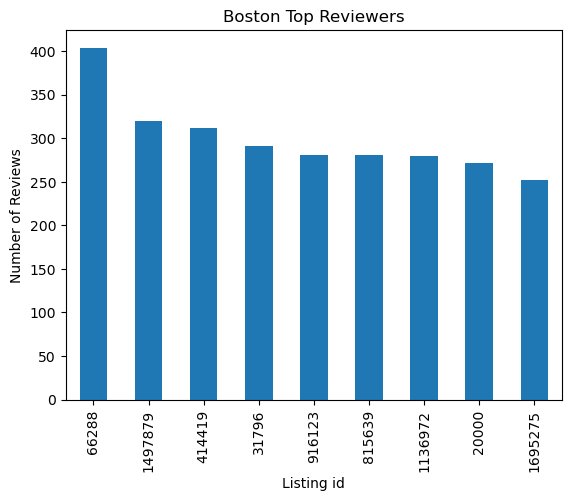

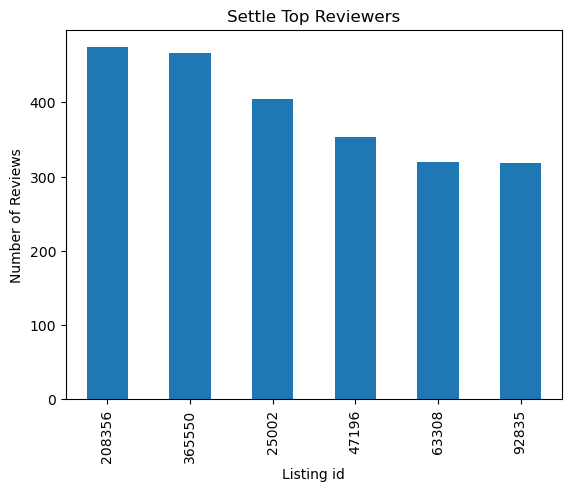

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [12]:
# Get the top reviewers

review_counts_boston = df_boston_reviews['listing_id'].value_counts()
top_reviewers_boston = review_counts_boston[review_counts_boston > 250]

top_reviewers_boston.plot(kind='bar')
plt.xlabel('Listing id')
plt.ylabel('Number of Reviews')
plt.title('Boston Top Reviewers')
#plt.savefig("fig2.png")
plt.show()

review_counts_seattle = df_seattle_reviews['listing_id'].value_counts()
top_reviewers_seattle = review_counts_seattle[review_counts_seattle > 300]

top_reviewers_seattle.plot(kind='bar')
plt.xlabel('Listing id')
plt.ylabel('Number of Reviews')
plt.title('Settle Top Reviewers')
#plt.savefig("fig3.png")
plt.show()

df_boston_reviews.head()

**Insights**

One apartment in Boston stands out as the most reviewed, with over 400 reviews—nearly 70 more than the second-highest reviewed apartment.

Seattle's top accommodations generally have more reviews than those in Boston.

As is common in travel, many travelers rely on reviews, making them a crucial factor in booking decisions. For Airbnb, this metric can provide valuable insights into what makes certain properties more popular. Encouraging other hosts to highlight these key features could increase activity and bookings across the platform.

# **Question 3: How does availability vary based on location and month?**
**Prepare Data**

In order to count the number where accomodations are available, a map needs to be made to translate the values form 't'/'f' to 'True'/'False'.

Once translated and grouped the data by month, it is counted the values when an accomodation is available.

**Data Modelling**

In a bar chart, it is shown the availability of accomodations per month.

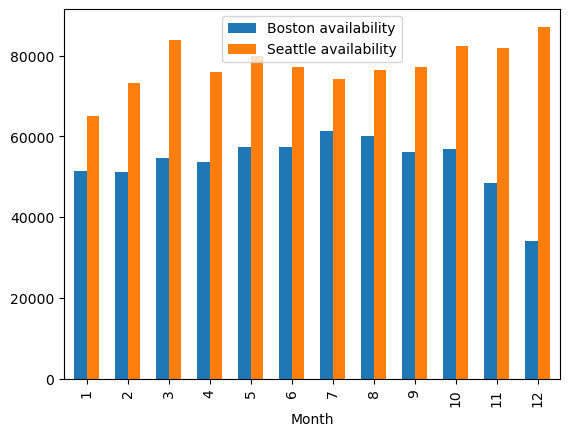

In [15]:
# Get the number of available days per month
df_seattle_calendar['available'] = df_seattle_calendar['available'].map({'t': True, 'f': False})
df_boston_calendar['available'] = df_boston_calendar['available'].map({'t': True, 'f': False})

# Drop rows with NaN values in 'available' column
df_seattle_calendar = df_seattle_calendar.dropna(subset=['available'])
df_boston_calendar = df_boston_calendar.dropna(subset=['available'])

# Group by 'month' and count the number of True values in 'available' column
availability_month_seattle = df_seattle_calendar[df_seattle_calendar['available'] == True].groupby('month').sum()
availability_month_boston = df_boston_calendar[df_boston_calendar['available'] == True].groupby('month').sum()

# Reset index of availability_month_seattle
availability_month_seattle = availability_month_seattle.reset_index()

# Create df_availability_mixed DataFrame
df_availability_mixed = pd.DataFrame({ 
    'Month': availability_month_seattle['month'],
    'BostonAvailability': availability_month_boston['available'].values,
    'SeattleAvailability': availability_month_seattle['available'].values
})

# Set 'Month' as the index
df_availability_mixed.set_index('Month', inplace=True)

# Plotting the data
availability_plt = df_availability_mixed.plot(kind="bar", width=0.6) 
availability_plt.legend(["Boston availability", "Seattle availability"])
#plt.savefig("fig4.png")
plt.show()

**Insights**

On average, it's easier to find available accommodations in Seattle than in Boston.

In Boston, September and October are the months with the lowest availability.

# **Conclusions**

As mentioned at the beginning of the post, it's clear that accommodation prices vary due to several factors.

If you're price-conscious when planning a trip, considering different dates and locations can lead to significant savings.

One interesting observation when comparing the first and last charts is that the two months with the lowest availability in Boston—September and October—are also the most expensive.

Although it might seem minor, the number of reviews a property has can significantly impact its booking activity. It would be valuable to explore what features make the most reviewed accommodations stand out and how they contribute to higher review counts.

So, when planning your next trip, will you take the time to compare different locations and dates to see how much you could save?
